In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load speech file

In [6]:
# load data from pickle file
import pickle

pickle_in = open("speeches.pickle", "rb")
speeches_df = pickle.load(pickle_in)

In [7]:
speeches_df.head()

,type,speaker,date,speech
1789 inauguration George Washington,inauguration,George Washington,1789,Fellow-Citizens of the Senate and of the House...
1790 state_union George Washington,state_union,George Washington,1790,I embrace with great satisfaction the opportun...
1790 state_union George Washington,state_union,George Washington,1790,In meeting you again I feel much satisfaction ...
1791 state_union George Washington,state_union,George Washington,1791,I meet you upon the present occasion with the ...
1792 state_union George Washington,state_union,George Washington,1792,It is some abatement of the satisfaction with ...


In [8]:
speech_text = speeches_df['speech']

## Load topic matrix

In [9]:
pickle_in = open("topics.pickle", "rb")
topics_df = pickle.load(pickle_in)

In [10]:
topics_df.set_index(speeches_df.index, inplace=True)

In [11]:
topics_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1789 inauguration George Washington,0.000000,0.0,0.0,0.012555,0.027843,0.002302,0.0,0.058544,0.000000,0.0,...,0.070463,0.00000,0.0,0.000000,0.0,0.0,0.042177,0.000000,0.405272,0.007363
1790 state_union George Washington,0.000000,0.0,0.0,0.000000,0.105852,0.004067,0.0,0.032762,0.000000,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1790 state_union George Washington,0.000000,0.0,0.0,0.000000,0.140909,0.000000,0.0,0.000000,0.001995,0.0,...,0.000000,0.00105,0.0,0.070268,0.0,0.0,0.009993,0.049600,0.000000,0.000000
1791 state_union George Washington,0.000000,0.0,0.0,0.000000,0.121443,0.016540,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.007991,0.000000,0.000000,0.000000
1792 state_union George Washington,0.015756,0.0,0.0,0.000000,0.081382,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.0,0.043682,0.0,0.0,0.052675,0.000045,0.000000,0.000000


## Sentiment Analysis

In [12]:
from textblob import TextBlob

In [13]:
speech_text[0:3]

1789 inauguration George Washington    Fellow-Citizens of the Senate and of the House...
1790 state_union George Washington     I embrace with great satisfaction the opportun...
1790 state_union George Washington     In meeting you again I feel much satisfaction ...
Name: speech, dtype: object

In [14]:
polarity_list = []
subjectivity_list = []

for speech in speech_text:
    polarity_list.append(TextBlob(speech).sentiment[:][0])
    subjectivity_list.append(TextBlob(speech).sentiment[:][1])

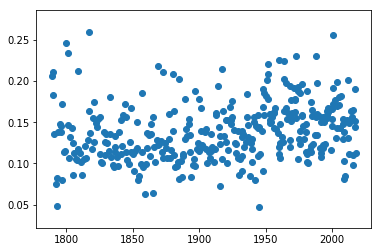

In [15]:
fig, ax = plt.subplots()
ax.scatter(speeches_df['date'], polarity_list);

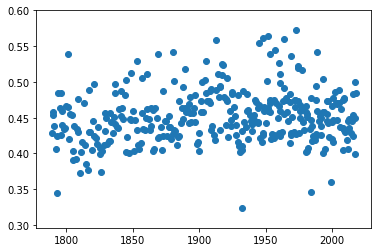

In [16]:
fig, ax = plt.subplots()
ax.scatter(speeches_df['date'], subjectivity_list);

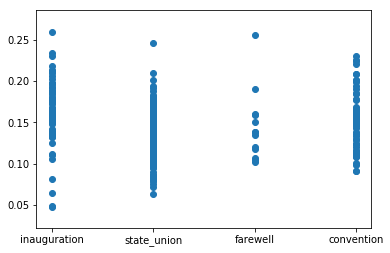

In [17]:
fig, ax = plt.subplots()
ax.scatter(speeches_df['type'], polarity_list);

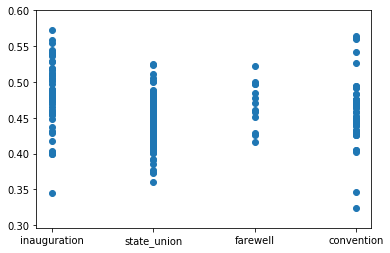

In [18]:
fig, ax = plt.subplots()
ax.scatter(speeches_df['type'], subjectivity_list);

## Keyword searching


In [19]:
import nltk
from nltk.tokenize import wordpunct_tokenize

Pattern of self vs collective references

In [20]:
# define pronouns to search for

i_words = ['i', 'me', 'my', 'mine', 'myself']
we_words = ['we', 'us', 'our', 'ours', 'ourselves']
u_words = ['you', 'your', 'yours', 'yourself', 'yourselves']
third_words = ['he', 'him', 'his', 'himself', 
               'she', 'her', 'hers', 'herself', 
               'they', 'them', 'their', 'theirs', 'themselves']

In [21]:
import collections

In [22]:
# tfidf leave pronouns in 

remove = ['.', ',', '(', ')', "'", '"', '?', '!', '.,', '...', 'applause', 'laughter']

i_per = []
we_per = []
u_per = []
third_per = []
total_per = []

for speech in speech_text:

    words = wordpunct_tokenize(speech)
    words = [w.lower() for w in words if w not in remove]
    
    freqs = collections.Counter()
    
    for word in words:
        if word in i_words:
            freqs['i_words'] += 1
        elif word in we_words:
            freqs['we_words'] += 1
        elif word in u_words:
            freqs['u_words'] += 1
        elif word in third_words:
            freqs['third_words'] += 1
        else:
            pass

    i_per.append(freqs['i_words'] / len(words) * 100)
    we_per.append(freqs['we_words'] / len(words) * 100)
    u_per.append(freqs['u_words'] / len(words) * 100)
    third_per.append(freqs['third_words'] / len(words) * 100)
#     total_per.append((freqs['i_words'] + freqs['we_words'] + freqs['u_words'] + freqs['third_words']) / len(words) * 100)


In [23]:
word_df = pd.DataFrame(list(zip(i_per, we_per, u_per, third_per)), columns = ['Me', 'Us', 'You', 'Them'])

In [24]:
word_df.head()

,Me,Us,You,Them
0,3.941909,0.207469,0.968188,1.244813
1,1.364877,1.182894,1.819836,1.182894
2,1.084599,2.024584,1.446132,1.590745
3,0.400000,0.177778,1.155556,1.333333
4,1.438159,0.719080,0.814957,1.150527


Normalize dataframe

In [25]:
word4_df = word_df.loc[:,"Me":"Them"].div(word_df.sum(axis=1), axis=0)

In [27]:
word4_df.head()

,Me,Us,You,Them
0,0.619565,0.032609,0.152174,0.195652
1,0.245902,0.213115,0.327869,0.213115
2,0.176471,0.329412,0.235294,0.258824
3,0.130435,0.057971,0.376812,0.434783
4,0.348837,0.174419,0.197674,0.279070


# export keyword dataframe to pickle file
pickle_out = open("keywords.pickle", "wb")
pickle.dump(word4_df, pickle_out)
pickle_out.close()

In [69]:
word2_df = word_df[['Us', 'Them']]

In [70]:
word2_df = word2_df.div(word2_df.sum(axis=1), axis=0)

In [75]:
word2_df.head()

,Us,Them
0,0.142857,0.857143
1,0.500000,0.500000
2,0.560000,0.440000
3,0.117647,0.882353
4,0.384615,0.615385


In [80]:
word2_df.dropna(inplace=True)

## Clustering

In [52]:
from sklearn.cluster import KMeans

cluster on 4 dimensions

In [53]:
X = word4_df.values

In [54]:
n = 10

# for i in range(10):
kmeans = KMeans(n_clusters = n).fit(X)

In [55]:
kmeans.labels_

array([0, 4, 4, 5, 5, 6, 9, 7, 3, 6, 0, 6, 5, 8, 6, 8, 4, 2, 8, 8, 2, 2,
       7, 2, 2, 6, 0, 8, 6, 8, 2, 2, 2, 7, 6, 8, 2, 7, 7, 2, 6, 7, 6, 2,
       2, 2, 4, 2, 7, 2, 6, 5, 6, 6, 6, 4, 5, 6, 6, 6, 4, 7, 7, 7, 6, 7,
       7, 6, 7, 6, 6, 7, 6, 7, 2, 7, 6, 0, 5, 6, 6, 6, 5, 6, 7, 7, 8, 7,
       7, 7, 6, 5, 5, 8, 5, 0, 6, 2, 6, 2, 2, 2, 7, 0, 6, 5, 5, 5, 0, 5,
       6, 5, 5, 5, 7, 7, 6, 8, 6, 8, 5, 5, 4, 7, 2, 6, 2, 6, 6, 8, 6, 6,
       6, 8, 6, 6, 8, 6, 2, 2, 6, 3, 6, 6, 8, 6, 8, 2, 2, 2, 2, 1, 6, 7,
       7, 7, 7, 6, 5, 5, 5, 6, 1, 6, 1, 8, 3, 8, 0, 2, 1, 6, 6, 5, 3, 1,
       1, 1, 8, 8, 8, 8, 1, 8, 2, 8, 0, 8, 8, 4, 8, 8, 4, 0, 8, 8, 3, 3,
       2, 6, 8, 1, 6, 1, 0, 1, 4, 1, 1, 8, 8, 8, 6, 3, 1, 1, 3, 3, 3, 5,
       1, 8, 1, 1, 1, 1, 3, 0, 1, 0, 8, 1, 1, 1, 4, 1, 3, 1, 1, 1, 4, 1,
       4, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 6, 4, 3, 4, 1, 4, 1, 8,
       1, 3, 3, 1, 1, 3, 0, 0, 3, 4, 1, 3, 1, 3, 3, 1, 1, 1, 4, 8, 3, 3,
       1, 8, 1, 4, 1, 8, 1, 1, 3, 3, 3, 4, 0, 4, 3,

In [56]:
kmeans.cluster_centers_

array([[0.45984541, 0.22863506, 0.12126711, 0.19025242],
       [0.11296707, 0.70156993, 0.03512161, 0.15034139],
       [0.09094602, 0.43061521, 0.03473474, 0.44370403],
       [0.23206543, 0.55369916, 0.07686738, 0.13736803],
       [0.28427683, 0.38898671, 0.11395428, 0.21278218],
       [0.33973202, 0.20035289, 0.08258713, 0.37732796],
       [0.22307123, 0.34208115, 0.05096936, 0.38387825],
       [0.15357791, 0.26942332, 0.04226175, 0.53473702],
       [0.15470617, 0.52632852, 0.04985294, 0.26911236],
       [0.9       , 0.        , 0.1       , 0.        ]])

In [57]:
(kmeans.cluster_centers_).shape

(10, 4)

### 2-d clustering

In [81]:
X = word2_df.values

In [85]:
n = 5

kmeans = KMeans(n_clusters = n).fit(X)

In [86]:
kmeans.labels_

array([3, 4, 4, 3, 1, 1, 1, 2, 1, 1, 1, 3, 4, 4, 0, 4, 4, 0, 0, 4, 4, 1,
       1, 4, 4, 1, 0, 4, 0, 1, 4, 1, 1, 1, 0, 4, 1, 3, 4, 4, 1, 1, 1, 4,
       1, 0, 4, 3, 1, 1, 4, 1, 4, 4, 0, 1, 4, 1, 1, 0, 3, 3, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 4, 1, 1, 1, 4, 0, 1, 1, 1, 4, 1, 1, 3, 3, 4, 1, 1,
       3, 1, 3, 3, 0, 1, 3, 1, 4, 4, 1, 1, 4, 3, 4, 4, 3, 3, 3, 1, 3, 4,
       3, 4, 1, 1, 3, 4, 0, 1, 4, 1, 1, 4, 1, 4, 1, 1, 4, 1, 0, 4, 4, 1,
       0, 4, 4, 0, 1, 4, 4, 4, 2, 4, 1, 2, 4, 0, 4, 4, 4, 1, 2, 1, 1, 1,
       1, 3, 4, 3, 3, 3, 4, 2, 4, 2, 0, 2, 0, 4, 4, 2, 1, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4,
       4, 0, 2, 4, 2, 1, 2, 4, 2, 2, 0, 0, 0, 4, 0, 2, 2, 0, 2, 2, 3, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 4, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,

In [91]:
centers = kmeans.cluster_centers_

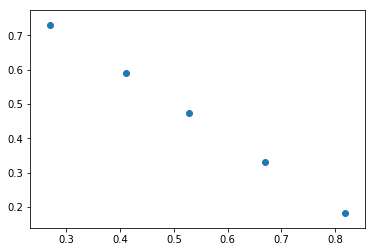

In [92]:
plt.scatter(centers[:, 0], centers[:, 1])